<img src="BL.png">
# Training und Test eines Support Vector Classifiers mit scikit-learn für Profifußballer

In [67]:
#PANDAS FÜR TRANSFORMATION DER DATEN
import pandas as pd
import numpy as np
#IMPORT UND LÖSCHEN DES AUTOMATISCH NEU ANGELEGTEN INDEX'
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv').drop('Unnamed: 0', axis=1)
player_info = pd.read_csv('player_info.csv', encoding = "ISO-8859-1")
X = X.drop('Unnamed: 0', axis=1)

X.join(player_info, how='left')




,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,crossing,...,penalties,composure,marking,standing_tackle,Unnamed: 0,index,full_name,club,age,league
0,185.0,80.0,94,90,93,82,90,33,80,85,...,85,95,22,31,0,0,C. Ronaldo dos Santos Aveiro,Real Madrid CF,32,Spanish Primera División
1,170.0,72.0,93,89,90,86,96,26,61,77,...,78,96,13,28,1,1,Lionel Messi,FC Barcelona,30,Spanish Primera División
2,175.0,68.0,92,92,84,79,95,30,60,75,...,81,92,21,24,2,2,Neymar da Silva Santos Jr.,Paris Saint-Germain,25,French Ligue 1
3,182.0,86.0,92,82,90,79,87,42,81,77,...,85,83,30,45,3,3,Luis Suárez,FC Barcelona,30,Spanish Primera División
4,193.0,92.0,92,91,90,95,89,60,91,15,...,47,70,10,10,4,4,Manuel Neuer,FC Bayern Munich,31,German Bundesliga
5,185.0,79.0,91,81,88,75,86,38,82,62,...,84,87,25,42,5,5,Robert Lewandowski,FC Bayern Munich,28,German Bundesliga
6,193.0,76.0,90,90,85,87,90,58,86,17,...,40,64,13,21,6,6,David De Gea Quintana,Manchester United,26,English Premier League
7,173.0,76.0,90,90,82,84,92,32,66,80,...,86,87,25,27,7,7,Eden Hazard,Chelsea,26,English Premier League
8,182.0,78.0,90,56,81,89,81,73,70,85,...,73,85,63,82,8,8,Toni Kroos,Real Madrid CF,27,Spanish Primera División
9,184.0,87.0,90,79,87,70,83,25,74,68,...,70,86,12,22,9,9,Gonzalo Higuaín,Juventus,29,Italian Serie A


In [68]:
col_names = list(X.columns.values)

X.describe()

,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,crossing,...,jumping,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
count,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,...,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000
mean,182.169090,76.161038,71.003802,69.338627,57.685976,62.005144,67.498099,52.799597,66.970924,53.893312,...,66.230374,51.171997,59.298367,50.013196,53.271304,56.577499,51.485797,62.437486,46.638112,50.929099
std,6.580667,7.079574,7.073329,11.033824,14.458914,10.550368,10.348316,18.711781,10.002150,19.891035,...,11.726304,20.622075,18.008660,22.612998,21.138173,15.423368,16.676786,13.442730,23.677912,23.799256
min,162.000000,52.000000,46.000000,23.000000,14.000000,29.000000,29.000000,15.000000,33.000000,7.000000,...,25.000000,5.000000,11.000000,5.000000,2.000000,10.000000,9.000000,11.000000,5.000000,8.000000
25%,178.000000,71.000000,66.000000,63.000000,48.000000,56.000000,62.000000,35.000000,61.000000,42.000000,...,59.000000,36.000000,47.000000,27.000000,41.000000,46.000000,42.000000,56.000000,22.000000,28.000000
50%,182.000000,76.000000,71.000000,70.000000,60.000000,63.000000,69.000000,57.000000,68.000000,59.000000,...,67.000000,56.000000,63.000000,56.000000,59.000000,59.000000,53.000000,65.000000,52.000000,59.000000
75%,187.000000,81.000000,76.000000,77.000000,69.000000,70.000000,75.000000,69.000000,74.500000,69.000000,...,74.000000,68.000000,73.000000,70.000000,69.000000,68.000000,64.000000,72.000000,68.000000,72.000000
max,203.000000,110.000000,94.000000,96.000000,93.000000,95.000000,96.000000,90.000000,91.000000,90.000000,...,95.000000,92.000000,94.000000,92.000000,95.000000,94.000000,92.000000,96.000000,92.000000,92.000000


## Standardisieren der Daten
Um das Training von verschiedenen Wertebereichen der Features unabhängig zu machen, standardisieren wir jede Spalte (z.B. "height_cm" aus [150,210] und "dri" aus [0.3,1.0] -> das Feature "height_cm" wird stärker gewichtet).<br><br>
Sei $C$ eine Spalte der Länge $n$, dann kann man die Werte in der Spalte als Ausgang eines $n$-fach wiederholten Zufallsexperiments auffassen. Sei $X$ diejenige Zufallsvariable, die die einfache Ausführung des Zufallsexperiments beschreibt.<br>

Wir standardisieren nun alle $x\in C$ durch:<br>
$ x_{std}=\frac{x - \mathbb{E}(X)}{\sqrt{Var(X)}}$
<br>

Beim Standardisieren handelt es sich um einen Isomorphismus, und<br>
$X\sim\sigma(a,b) \Rightarrow X_{std}  \sim\sigma(0,1)$


In [69]:
#SKALIEREN DER DATEN

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_X = sc_X.fit(X)

X = sc_X.transform(X)

X = pd.DataFrame(X)
X.columns=col_names

X.describe()








,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,crossing,...,jumping,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
count,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,...,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03,4.471000e+03
mean,4.360934e-16,-5.466992e-15,-1.422943e-14,-2.642882e-15,-6.589724e-15,-1.272349e-14,-1.230657e-16,-1.038832e-15,-2.241404e-15,-8.883274e-16,...,4.757744e-16,-5.627597e-16,1.776866e-15,1.599630e-15,1.107541e-15,4.148375e-16,3.418821e-16,-2.567940e-15,6.470507e-16,-1.535564e-15
std,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,...,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,-3.065243e+00,-3.413163e+00,-3.535337e+00,-4.200159e+00,-3.021725e+00,-3.128690e+00,-3.720645e+00,-2.020322e+00,-3.396742e+00,-2.357774e+00,...,-3.516452e+00,-2.239210e+00,-2.682252e+00,-1.990812e+00,-2.425803e+00,-3.020268e+00,-2.547886e+00,-3.826845e+00,-1.758718e+00,-1.804002e+00
25%,-6.336069e-01,-7.290855e-01,-7.074975e-01,-5.745366e-01,-6.699714e-01,-5.692518e-01,-5.313632e-01,-9.513572e-01,-5.970308e-01,-5.979901e-01,...,-6.166634e-01,-7.357986e-01,-6.829904e-01,-1.017812e+00,-5.805931e-01,-6.858867e-01,-5.688661e-01,-4.789359e-01,-1.040669e+00,-9.635454e-01
50%,-2.569779e-02,-2.274936e-02,-5.376121e-04,5.994724e-02,1.600592e-01,9.430638e-02,1.451511e-01,2.245041e-01,1.028970e-01,2.567618e-01,...,6.563983e-02,2.341444e-01,2.055704e-01,2.647802e-01,2.710422e-01,1.570845e-01,9.080719e-02,1.906458e-01,2.264764e-01,3.391620e-01
75%,7.341886e-01,6.835868e-01,7.064222e-01,6.944311e-01,7.825822e-01,7.578646e-01,7.250204e-01,8.658831e-01,7.528300e-01,7.595571e-01,...,6.626551e-01,8.161102e-01,7.609209e-01,8.839624e-01,7.441729e-01,7.406799e-01,7.504805e-01,7.114316e-01,9.022872e-01,8.854587e-01
max,3.165825e+00,4.780337e+00,3.251478e+00,2.416602e+00,2.442644e+00,3.127715e+00,2.754563e+00,1.988296e+00,2.402660e+00,1.815427e+00,...,2.453701e+00,1.980042e+00,1.927157e+00,1.856963e+00,1.974313e+00,2.426622e+00,2.429649e+00,2.496983e+00,1.916003e+00,1.725915e+00


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1)

In [71]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc = svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Precision in sample :{}% \n Precision in test: {}%'.format(100*svc.score(X_train,y_train),100*svc.score(X_test,y_test)))

C:\Users\MartinDammrath\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Precision in sample :94.00944568729803% 
 Precision in test: 93.97321428571429%


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Mittelfeld       0.92      0.85      0.88       116
       Sturm       0.95      0.99      0.97       141
     Torwart       1.00      1.00      1.00        43
Verteidigung       0.93      0.95      0.94       148

 avg / total       0.94      0.94      0.94       448



In [73]:
#Reduziere Feature-Anzahl auf 8 (statt 36).

#X_train_modif = X_train_modif.join(y_train)
from sklearn.decomposition import PCA
pca = PCA(n_components= 3)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, index=X.index, columns=['PC1','PC2','PC3'])

#VERSCHLECHTERT PERFORMANCE, WARUM?: Scale X_pca
#sc_X = StandardScaler().fit(X_pca)
#X_pca = sc_X.transform(X_pca)

X_pca_train,X_pca_test,y_pca_train,y_pca_test = train_test_split(X_pca,y, test_size=0.1)

svc_pca = SVC()
svc_pca = svc_pca.fit(X_pca_train,y_pca_train)
y_pred_pca = svc_pca.predict(X_pca_test)
print('Precision in sample :{}% \n Precision in test: {}%'.format(100*svc_pca.score(X_pca_train,y_pca_train),100*svc_pca.score(X_pca_test,y_pca_test)))






C:\Users\MartinDammrath\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Precision in sample :84.36490181456624% 
 Precision in test: 83.03571428571429%


In [74]:
print(classification_report(y_pca_test, y_pred_pca))

              precision    recall  f1-score   support

  Mittelfeld       0.73      0.54      0.62       114
       Sturm       0.85      0.93      0.89       138
     Torwart       1.00      1.00      1.00        50
Verteidigung       0.81      0.90      0.86       146

 avg / total       0.82      0.83      0.82       448



In [75]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4, random_state=0)
k_means = k_means.fit(X_pca_train)
y_k_means = k_means.predict(X_pca_test)
y_k_means = pd.DataFrame(y_k_means, columns=['k_means_result'], index=y_pca_test.index) 
y_k_means
y_test_1 = y_pca_test.join(y_k_means, how='left')
y_test_1.groupby(['Position','k_means_result']).size()


Position      k_means_result
Mittelfeld    1                  68
              2                  16
              3                  30
Sturm         1                  67
              2                   1
              3                  70
Torwart       0                  50
Verteidigung  1                  41
              2                 102
              3                   3
dtype: int64

In [76]:
k_means_stats = pd.DataFrame(k_means.predict(X_pca), index=X_pca.index, columns=['k-means Cluster Number'])
def join_cluster_center(x):
    return k_means.cluster_centers_[x]
k_means_stats['Cluster Center'] = k_means_stats['k-means Cluster Number'].apply(join_cluster_center)
k_means_stats = k_means_stats.join(X_pca, how='left')
k_means_stats_0=k_means_stats.where(k_means_stats['k-means Cluster Number']==0).dropna()
k_means_stats_0=np.array(k_means_stats_0[['PC1','PC2','PC3']])
k_means_stats_1=k_means_stats.where(k_means_stats['k-means Cluster Number']==1).dropna()
k_means_stats_1=np.array(k_means_stats_1[['PC1','PC2','PC3']])
k_means_stats_2=k_means_stats.where(k_means_stats['k-means Cluster Number']==2).dropna()
k_means_stats_2=np.array(k_means_stats_2[['PC1','PC2','PC3']])
k_means_stats_3=k_means_stats.where(k_means_stats['k-means Cluster Number']==3).dropna()
k_means_stats_3=np.array(k_means_stats_3[['PC1','PC2','PC3']])
#PCA_Datapoints = np.array(k_means_stats[['PC1','PC2','PC3']])
#k_means_stats['PCA Datapoints']=PCA_Datapoints.tolist()
#k_means_stats
#x_dp, y_dp, z_dp = PCA_Datapoints.T


#def calc_dist(x):
    


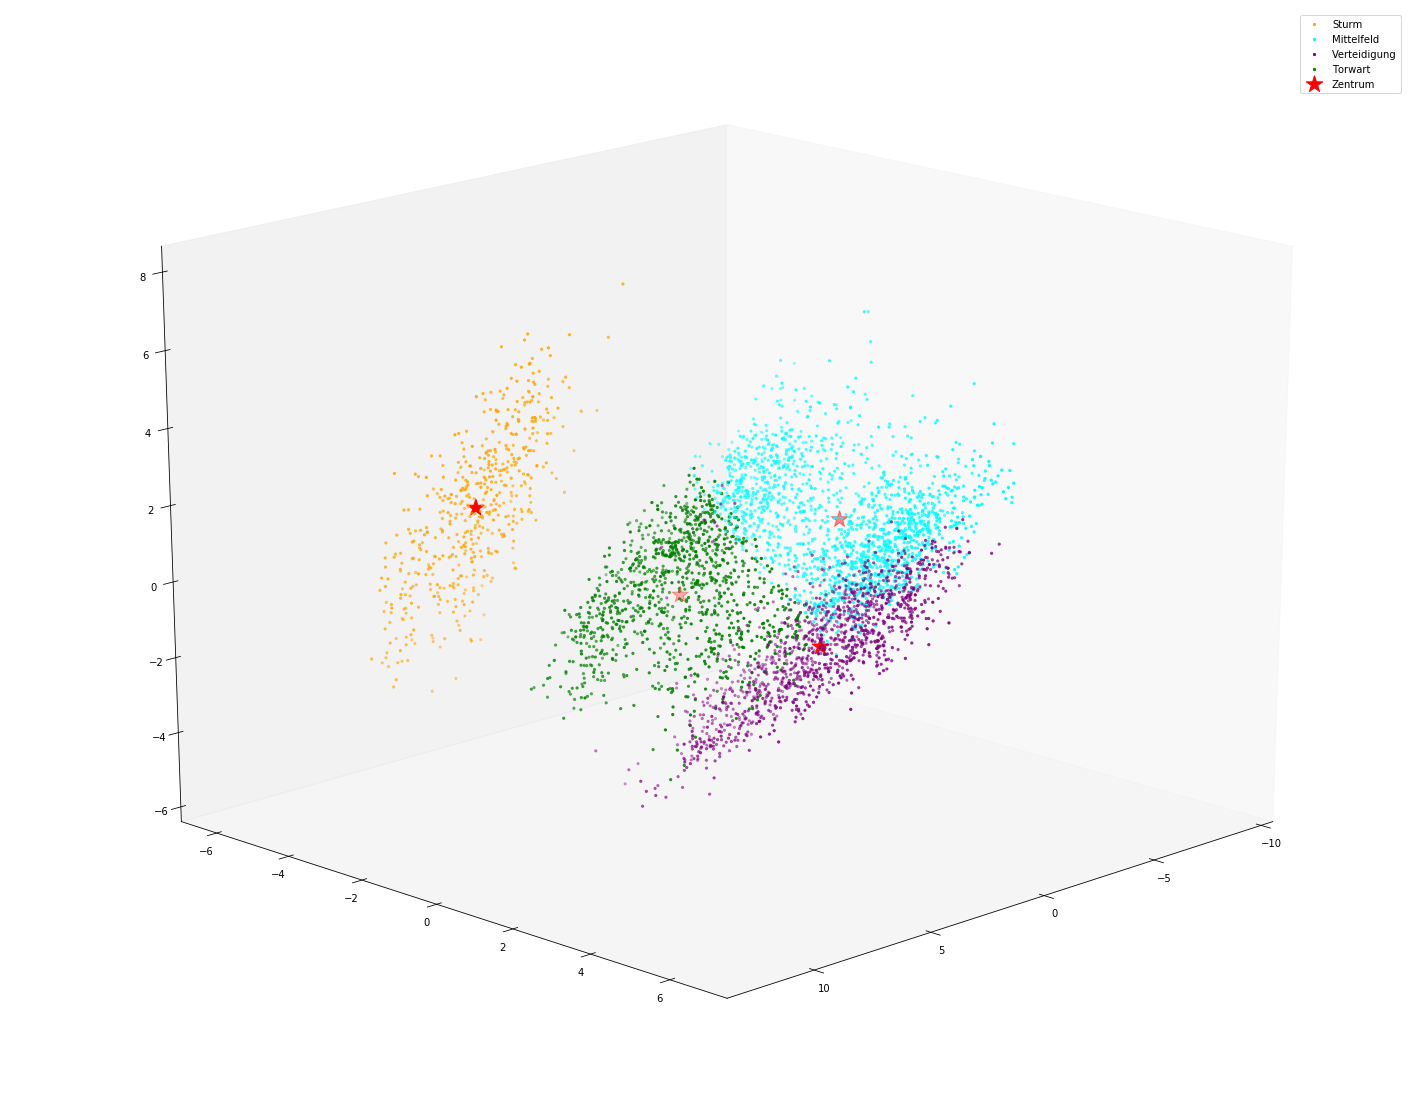

In [77]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(25,20))
ax = fig.gca(projection='3d')
#ax = fig.add_subplot(1, 1, 1, axisbg="white")
ax.scatter(k_means_stats_0[:,0], k_means_stats_0[:,1], k_means_stats_0[:,2],color='orange', label='Sturm',s=5)
ax.scatter(k_means_stats_1[:,0], k_means_stats_1[:,1], k_means_stats_1[:,2],color='cyan', label='Mittelfeld',s=5)
ax.scatter(k_means_stats_2[:,0], k_means_stats_2[:,1], k_means_stats_2[:,2],color='purple', label='Verteidigung',s=5)
ax.scatter(k_means_stats_3[:,0], k_means_stats_3[:,1], k_means_stats_3[:,2],color='green', label='Torwart',s=5)
ax.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], k_means.cluster_centers_[:,2],color='red',marker='*',s=300, label='Zentrum')
ax.legend()
ax.grid(False)
ax.view_init(20, 45)
plt.savefig("KMeans.jpg",dpi=500)
plt.show()


In [78]:
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

In [79]:
# Achtung, faulerweise überschrieb 

# y_pred = svc.predict(X)
# y_pred = pd.DataFrame(y_pred)
# y_pred = pd.DataFrame(y_pred.values, index=y.index,columns=['Prediction'])
# y_pred_vs_test = y_pred.join(y, how="left")
# y_pred_vs_test = y_pred_vs_test.join(player_info, how='left')
# y_pred_vs_test = y_pred_vs_test.where(y_pred_vs_test['Prediction'] != y_pred_vs_test['Position'])
# y_pred_vs_test.dropna(inplace=True)
# y_pred_vs_test = y_pred_vs_test.drop(['index','Unnamed: 0'], axis=1)
# y_pred_vs_test = y_pred_vs_test.join(X['overall'])
# y_pred_vs_test.loc[y_pred_vs_test['league'] == 'German Bundesliga']

#missmatch_count = y_pred_vs_test.groupby(['club']).size().reset_index(name='counts')
#missmatch_count


In [80]:
# from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=4, random_state=0)
# k_means = k_means.fit(X_train)
# means_pos = pd.DataFrame(k_means.predict(X_train)).reindex(index=X_train.index).join(y_train)
# means_pos

In [81]:
# X_pca[:,0].tolist()
# X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2']).reindex(index=X_train_modif.index)
# X_pca = X_pca.join(y, how='right')
# from matplotlib import pyplot as plt
# # plt.clf()
# # plt.plot(X_pca.iloc[:,0],X_pca.iloc[:,1], 'bo ')
# # plt.show()

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = ['Torwart','Verteidigung','Mittelfeld','Sturm']
# colors = ['r', 'g', 'b','m']
# for target, color in zip(targets,colors):
#     indicesToKeep = X_pca['Position'] == target
#     ax.scatter(X_pca.loc[indicesToKeep, 'PC1']
#                , X_pca.loc[indicesToKeep, 'PC2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()
# plt.show()

In [82]:
# ind_of_no_match = []
# import numpy as np
# y_test_array = np.array(y_test)

# for i in range(0,len(y_pred)):
#     if not y_pred[i]==y_test_array[i,0]:
#         ind_of_no_match.append(i)
        
# ind_of_no_match
# player_info = pd.read_csv('player_info.csv', encoding = "ISO-8859-1")
# missmatches = []
# for i in ind_of_no_match:
#     missmatches.append([player_info.iloc[i,2],y_test_array[i,0],y_pred[i]])

# missmatches = pd.DataFrame(missmatches, columns=['Player_Name','Real_Pos','Predicted_Pos'])
# missmatches



In [83]:
# X_missmatched = []
# for i in ind_of_no_match:
#     X_missmatched.append(X.iloc[i,:])
# X_missmatched = pd.DataFrame(X_missmatched)
# X_missmatched

In [84]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# pca_components = pca.fit_transform(X_train)
# principalDf = pd.DataFrame(data = pca_components, columns = ['principal component 1', 'principal component 2','principal component 3'])

# finalDf = pd.concat([principalDf, y], axis = 1)

# finalDf

In [85]:
# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_zlabel('Principal Component 3', fontsize = 15)
# ax.set_title('3 component PCA', fontsize = 20)
# targets = ['Verteidigung','Sturm','Torwart','Mittelfeld']
# colors = ['r', 'g', 'b', 'm']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['Position'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , finalDf.loc[indicesToKeep, 'principal component 3']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()



# ax.view_init(azim=250, elev=20)
# fig

In [86]:
# ax.view_init(azim=180, elev=20)
# fig